# 1. Basic Definitions 
Let's take a moment to start from the beginning. In any data generating process, we have what is a called a **ground truth function**, which we will call:

#### $$f(x)$$

Data generating processes tend to be noisy, meaning that we cannot predict the exact values we are going to get, and instead we are going to try and find a way to predict the response, $Y$. The response is just the **ground truth function** plus noise:

#### $$Y = f(x) + \epsilon$$

For this demo, we are going to say that our estimate of $f(x)$, is $\hat{f}(x)$. 

---
<br>
# 2. Ground Truth Function

We are going to be working with a ground truth function, $f(x)$:

#### $$f(x) = sin(x)$$

Lets take a moment to define and plot that ground truth function:

In [132]:
# First set of imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Seaborn Plot Styling
sns.set(style="white", palette="husl")
sns.set_context("poster")
sns.set_style("ticks")

In [133]:
"""Function that takes in a 1 dimensional X (not the polynomial), and returns the sin(X)"""
def f(X):
    return np.sin(X)

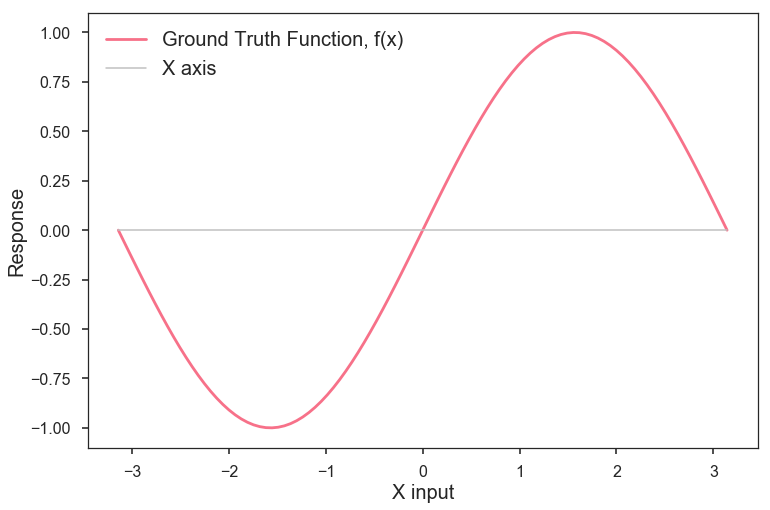

In [134]:
"""Create x axis data, Ground Truth Function, and y values to plot x axis"""
x_axis = np.linspace(-np.pi, np.pi, 100)              
ground_truth_function = f(x_axis)               
y_0 = np.zeros(100)                                  

"""Set fig size, Plot Ground Truth Function, X axis"""
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x_axis, ground_truth_function)
plt.plot(x_axis, y_0, linewidth=1.5, color='silver')

"""Create legend & labels"""
ax.legend(['Ground Truth Function, f(x)', 'X axis'], fontsize=20)
ax.set_xlabel('X input', fontsize=20)
ax.set_ylabel('Response', fontsize=20)

plt.show()

Awesome, as expected we have a standard **sine** curve that is our ground truth function. 

---
<br>
# 3. $Y$ Response
Now, as was mentioned earlier, this ground truth function is generating the data, but it is a **noisy** process! That means that a certain amount of noise will be incorporated in our response. This is our **irreducible error**:

#### $$Y = f(x) + \epsilon$$

Let's now plot 3 different $Y$ curves, each with different random noise (each has the same variance keep in mind), and compare to our original ground truth function. 

In [135]:
NOISE_VARIANCE = 0.1     # Variance in noise (variance in irreducible error)
np.random.seed(2)

"""Creating 3 different Y response's, based on ground truth function and irreducible error"""
Y1 = ground_truth_function + np.random.randn(100)*NOISE_VARIANCE
Y2 = ground_truth_function + np.random.randn(100)*NOISE_VARIANCE
Y3 = ground_truth_function + np.random.randn(100)*NOISE_VARIANCE

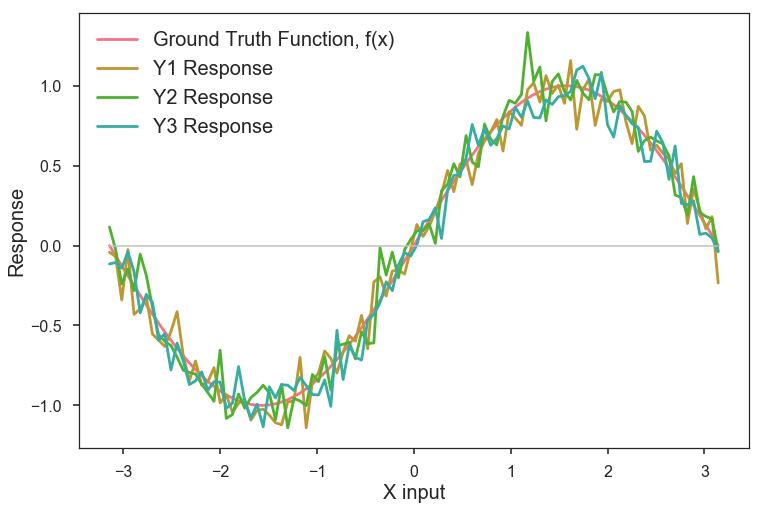

In [136]:
"""Set fig size, Plot Ground Truth Function, X axis, Y1, Y2, Y3"""
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x_axis, ground_truth_function)
plt.plot(x_axis, Y1)
plt.plot(x_axis, Y2)
plt.plot(x_axis, Y3)
plt.plot(x_axis, y_0, linewidth=1.5, color='silver')

"""Create legend & labels"""
ax.legend(['Ground Truth Function, f(x)',
           'Y1 Response', 'Y2 Response', 'Y3 Response' ], fontsize=20)
ax.set_xlabel('X input', fontsize=20)
ax.set_ylabel('Response', fontsize=20)

plt.show()

Great! You can see the original ground truth function that is actually generating our Y responses, and we can see each of the three Y responses and how they are rather noisy, even when the variance in our noise is only 0.1. 

A key point to keep in mind here is that the ground truth function is what we are trying to **learn**. If we had it, our work would be done! In other words, the goal of our model is to entirely learn the ground truth function that generates the data, and not actually learn the noise! Mathematically, the absolute best that you can ever do is learn the ground truth function. 

**However**, we do *not* have access to the ground truth function! We usually have access to input data, $X$, and noisy response data, $Y$. Clearly we hope that the $Y$ response data we have is not too noisy and that it represents the ground truth function well. If we think about our training process, we will never have the $f(x)$ response as a label! Our $X$ training data is always going to be paired with a $Y$ response, which is inherently noisy. We will talk about some ways to handle that in subsequent walk throughs, but for now, lets try training a linear regression model on the $Y$ response data, with the goal of learning the ground truth function $f(x)$.

---

# 4. Create Linear Regression Model 
We can now try and learn the ground truth function as we create our own estimate of $f$, which will call $\hat{f}(x)$:
#### $$\hat{f}(x) = estimate\;of\;f(x)$$

To do so, we can take 25 random points in $X$ (remember, X is an array of 100 points), get the $Y$ values that correspond to it, and then train a linear regression model based on that. 

<br>
## 4.1 1st Order Polynomial
We can first start with an $X$ that only consists of 1 dimension. 

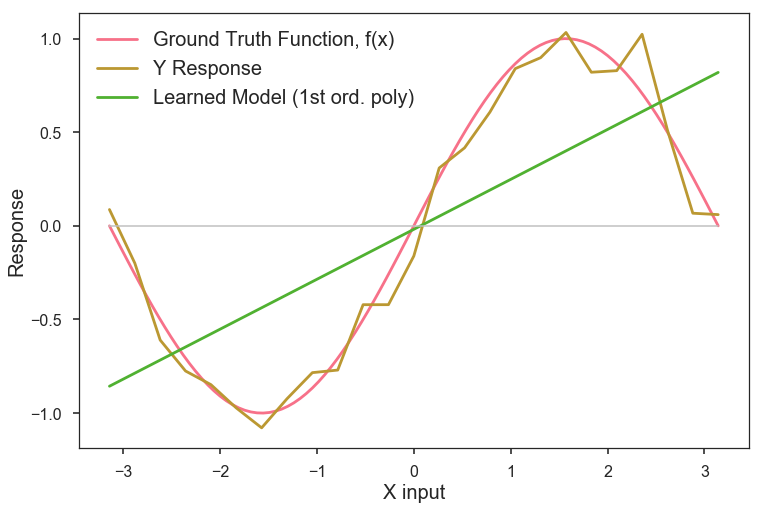

In [137]:
from sklearn.linear_model import LinearRegression

"""Define a function that will create a polynomial of dth order"""
def make_poly(x, D):
  N = len(x)
  X = np.empty((N, D+1))
  for d in range(D+1):
    X[:,d] = x**d
    if d > 1:
      X[:,d] = (X[:,d] - X[:,d].mean()) / X[:,d].std()
  return X


"""Grab 25 points from x_axis, generate 25 Y responses, create X polynomial"""
N = 25
X = np.linspace(-np.pi, np.pi, N)
Y = f(X) + np.random.randn(N)*NOISE_VARIANCE
X_poly_d_1 = make_poly(X, 1)                       # shape 25 x 2 (1 bias term, 1 weight)

"""Create Linear Regression Model"""
model_d1 = LinearRegression()
model_d1.fit(X_poly_d_1, Y)


"""Create x axis polynomial for plotting, and Y response based on model"""
x_axis_poly = make_poly(x_axis, 1)
prediction_axis = model_d1.predict(x_axis_poly)

"""Plot final result"""
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x_axis, ground_truth_function)
plt.plot(X, Y)
plt.plot(x_axis, prediction_axis)
plt.plot(x_axis, y_0, linewidth=1.5, color='silver')

"""Create legend & labels"""
ax.legend(['Ground Truth Function, f(x)', 
           'Y Response', 'Learned Model (1st ord. poly)'], fontsize=20)
ax.set_xlabel('X input', fontsize=20)
ax.set_ylabel('Response', fontsize=20)

plt.show()

The plot above shows our ground truth function, $sin(x)$, the response it generated, **Y response**, and the learned linear regression model. The regression model was a straight line because we only gave it an input of 1 dimension, meaning our learned function could only ever look as complex as:
#### $$\hat{f}(x) = w_1x_1 + intercept $$
In other, words, the linear regression model was really only able to find one weight and one bias. We can look at them quickly just for reference:

In [138]:
coefficients = model_d1.coef_
df = pd.DataFrame(coefficients)
df = df.rename({0: "Weights"}, axis='columns')
df = df.rename({0: "Bias Term", 1: "W_1"}, axis='index')
display(df)

Weights
Bias Term  0.000000
W_1        0.266744

## 4.2 2nd Order Polynomial 
We can clearly see that the **first order polynomial** function that our linear regression model learned is not a very good mapping to our ground truth function. Let's now create another term, $x_2$, which will equal:
#### $$x_2 = x_1^2$$

That will be our second dimension  and let our linear regression model create a **2nd order polynomial** learned function. 

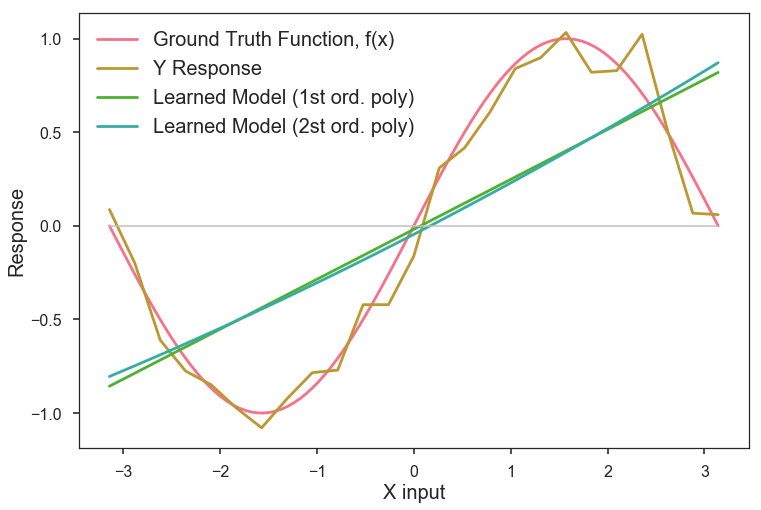

In [139]:
"""Grab 25 points from x_axis"""
N = 25
X = np.linspace(-np.pi, np.pi, N)

"""------------- Create Linear Regression Model, Order 1 --------------"""
X_poly_d_1 = make_poly(X, 1)                       # shape 25 x 2 (1 bias term, 1 weight)
model_d1 = LinearRegression()
model_d1.fit(X_poly_d_1, Y)

# Create x axis polynomial for plotting, and Y response based on model
x_axis_poly_1 = make_poly(x_axis, 1)
prediction_axis_poly_1 = model_d1.predict(x_axis_poly_1)

"""------------- Create Linear Regression Model, Order 2 --------------"""
X_poly_d_2 = make_poly(X, 2)                       # shape 25 x 3 (1 bias term, 2 weights)
model_d2 = LinearRegression()
model_d2.fit(X_poly_d_2, Y)

# Create x axis polynomial for plotting, and Y response based on model
x_axis_poly_2 = make_poly(x_axis, 2)
prediction_axis_poly_2 = model_d2.predict(x_axis_poly_2)

"""Plot final result"""
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x_axis, ground_truth_function)
plt.plot(X, Y)
plt.plot(x_axis, prediction_axis_poly_1)
plt.plot(x_axis, prediction_axis_poly_2)
plt.plot(x_axis, y_0, linewidth=1.5, color='silver')

"""Create legend & labels"""
ax.legend(['Ground Truth Function, f(x)', 
           'Y Response', 'Learned Model (1st ord. poly)',
           'Learned Model (2st ord. poly)'], fontsize=20)
ax.set_xlabel('X input', fontsize=20)
ax.set_ylabel('Response', fontsize=20)

plt.show()

Very interesting, our model has become more complex as we have added a 2nd dimension, $x_2$, however it did not appear to make mapping function $\hat{f}(x)$ any better. For reference, here are the coefficients that our linear regression model learned:

In [140]:
coefficients = model_d2.coef_
df = pd.DataFrame(coefficients)
df = df.rename({0: "Weights"}, axis='columns')
df = df.rename({0: "Bias Term", 1: "W_1", 2:"W_2"}, axis='index')
display(df)

Weights
Bias Term  0.000000
W_1        0.266744
W_2        0.023980

## 4.3 3rd Order Polynomial 
Okay, let's create one more input dimension, $x_3$, which will equal:
#### $$x_3 = x_1^3$$
The goal is that these additional features will allow our linear regression model to become more complex and better map the ground truth function. Keep in mind, this is still a **linear model**. Our learned function will still be a linear combination:

#### $$\hat{f}(x) = w_1x_1 + w_2x_2 + w_3x_3 + bias$$

It just so happens that $x_2$ and $x_3$ are $x_1$ squared and cubed. Let's see if this function has a better time of approximating the ground truth $f(x)$:

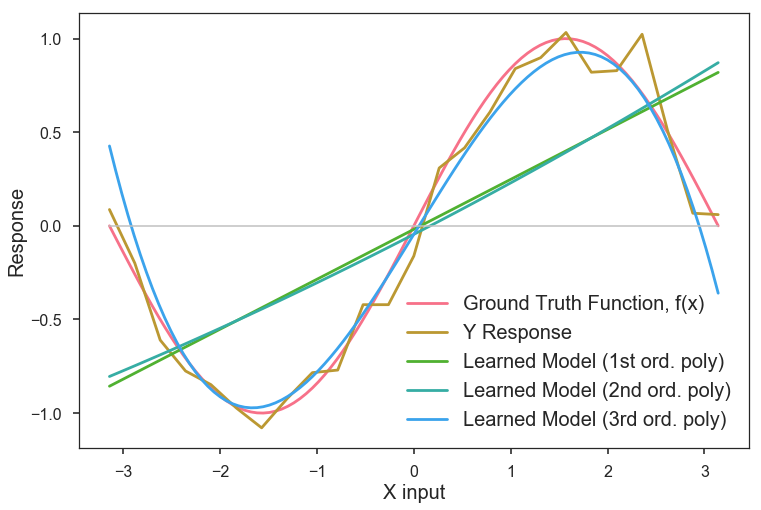

In [141]:
"""Grab 25 points from x_axis"""
N = 25
X = np.linspace(-np.pi, np.pi, N)

"""------------- Create Linear Regression Model, Order 1 --------------"""
X_poly_d_1 = make_poly(X, 1)                       # shape 25 x 2 (1 bias term, 1 weight)
model_d1 = LinearRegression()
model_d1.fit(X_poly_d_1, Y)

# Create x axis polynomial for plotting, and Y response based on model
x_axis_poly_1 = make_poly(x_axis, 1)
prediction_axis_poly_1 = model_d1.predict(x_axis_poly_1)

"""------------- Create Linear Regression Model, Order 2 --------------"""
X_poly_d_2 = make_poly(X, 2)                       # shape 25 x 3 (1 bias term, 2 weights)
model_d2 = LinearRegression()
model_d2.fit(X_poly_d_2, Y)

# Create x axis polynomial for plotting, and Y response based on model
x_axis_poly_2 = make_poly(x_axis, 2)
prediction_axis_poly_2 = model_d2.predict(x_axis_poly_2)

"""------------- Create Linear Regression Model, Order 3 --------------"""
X_poly_d_3 = make_poly(X, 3)                       # shape 25 x 4 (1 bias term, 3 weights)
model_d3 = LinearRegression()
model_d3.fit(X_poly_d_3, Y)

# Create x axis polynomial for plotting, and Y response based on model
x_axis_poly_3 = make_poly(x_axis, 3)
prediction_axis_poly_3 = model_d3.predict(x_axis_poly_3)

"""Plot final result"""
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x_axis, ground_truth_function)
plt.plot(X, Y)
plt.plot(x_axis, prediction_axis_poly_1)
plt.plot(x_axis, prediction_axis_poly_2)
plt.plot(x_axis, prediction_axis_poly_3)
plt.plot(x_axis, y_0, linewidth=1.5, color='silver')

"""Create legend & labels"""
ax.legend(['Ground Truth Function, f(x)', 
           'Y Response', 'Learned Model (1st ord. poly)',
           'Learned Model (2nd ord. poly)','Learned Model (3rd ord. poly)'], fontsize=20)
ax.set_xlabel('X input', fontsize=20)
ax.set_ylabel('Response', fontsize=20)

plt.show()

Awesome! Look at that, a much better approximation than the **1st** and **2nd** order models. However, we can still see that it isn't a perfect match. This may lead you to think that if the **3rd** order was good, then the **4th** and **5th** order must be better! In other words, a standard hypothesis at this point is that *as we create more input features, our model will be able to map the ground truth function more effectively*. Keep in mind though, that our model is **not** learning from the ground truth function; it is learning from the **Y response**, which is inherently noisy! We are not trying to learn the **Y response**, only the ground truth data generating function which produces it. As our model becomes more complex, it *will* be able to better map the ground truth function, **however**, it will also start being able to better map the **noise** in the **Y response** which is what it is actually learning from. 


<br>
## 4.4 4th, 5th, 6th Order Polynomials
Let's take a look at that visually. We will look at a **3rd**, **4th**, **5th**, and **6th** order polynomial learned function.

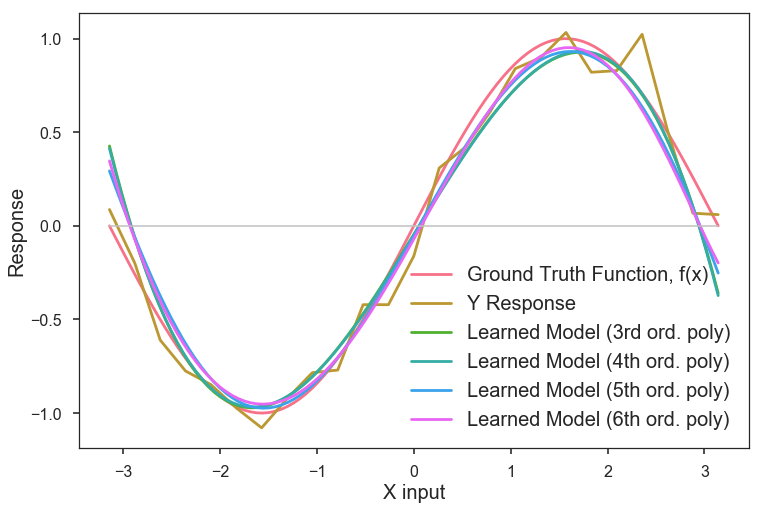

In [142]:
"""Grab 25 points from x_axis"""
N = 25
X = np.linspace(-np.pi, np.pi, N)

"""------------- Create Linear Regression Model, Order 3 --------------"""
X_poly_d_3 = make_poly(X, 3)                       # shape 25 x 4 (1 bias term, 3 weights)
model_d3 = LinearRegression()
model_d3.fit(X_poly_d_3, Y)

# Create x axis polynomial for plotting, and Y response based on model
x_axis_poly_3 = make_poly(x_axis, 3)
prediction_axis_poly_3 = model_d3.predict(x_axis_poly_3)

"""------------- Create Linear Regression Model, Order 4 --------------"""
X_poly_d_4 = make_poly(X, 4)                       # shape 25 x 5 (1 bias term, 4 weight)
model_d4 = LinearRegression()
model_d4.fit(X_poly_d_4, Y)

# Create x axis polynomial for plotting, and Y response based on model
x_axis_poly_4 = make_poly(x_axis, 4)
prediction_axis_poly_4 = model_d4.predict(x_axis_poly_4)

"""------------- Create Linear Regression Model, Order 5 --------------"""
X_poly_d_5 = make_poly(X, 5)                       # shape 25 x 6 (1 bias term, 5 weights)
model_d5 = LinearRegression()
model_d5.fit(X_poly_d_5, Y)

# Create x axis polynomial for plotting, and Y response based on model
x_axis_poly_5 = make_poly(x_axis, 5)
prediction_axis_poly_5 = model_d5.predict(x_axis_poly_5)

"""------------- Create Linear Regression Model, Order 6 --------------"""
X_poly_d_6 = make_poly(X, 6)                       # shape 25 x 3 (1 bias term, 6 weights)
model_d6 = LinearRegression()
model_d6.fit(X_poly_d_6, Y)

# Create x axis polynomial for plotting, and Y response based on model
x_axis_poly_6 = make_poly(x_axis, 6)
prediction_axis_poly_6 = model_d6.predict(x_axis_poly_6)

"""Plot final result"""
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x_axis, ground_truth_function)
plt.plot(X, Y)
plt.plot(x_axis, prediction_axis_poly_3)
plt.plot(x_axis, prediction_axis_poly_4)
plt.plot(x_axis, prediction_axis_poly_5)
plt.plot(x_axis, prediction_axis_poly_6)
plt.plot(x_axis, y_0, linewidth=1.5, color='silver')

"""Create legend & labels"""
ax.legend(['Ground Truth Function, f(x)', 
           'Y Response', 'Learned Model (3rd ord. poly)',
           'Learned Model (4th ord. poly)','Learned Model (5th ord. poly)',
           'Learned Model (6th ord. poly)'], fontsize=20)
ax.set_xlabel('X input', fontsize=20)
ax.set_ylabel('Response', fontsize=20)

plt.show()

Interesting, the learned models appear to have gotten slightly better, but they still could map the ground truth function a bit more effectively. 

## 4.5 12th Order Polynomial
Lets try and see how a **12th** order polynomial fairs.

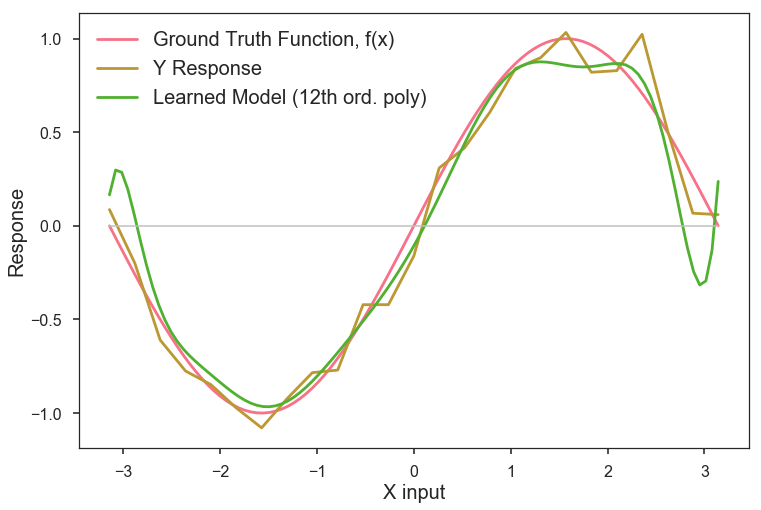

In [143]:
"""Grab 25 points from x_axis"""
N = 25
X = np.linspace(-np.pi, np.pi, N)

"""------------- Create Linear Regression Model, Order 12 --------------"""
X_poly_d_12 = make_poly(X, 12)                       # shape 25 x 13 (1 bias term, 12 weight)
model_d12 = LinearRegression()
model_d12.fit(X_poly_d_12, Y)

# Create x axis polynomial for plotting, and Y response based on model
x_axis_poly_12 = make_poly(x_axis, 12)
prediction_axis_poly_12 = model_d12.predict(x_axis_poly_12)

"""Plot final result"""
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x_axis, ground_truth_function)
plt.plot(X, Y)
plt.plot(x_axis, prediction_axis_poly_12)
plt.plot(x_axis, y_0, linewidth=1.5, color='silver')

"""Create legend & labels"""
ax.legend(['Ground Truth Function, f(x)', 
           'Y Response', 'Learned Model (12th ord. poly)'], fontsize=20)
ax.set_xlabel('X input', fontsize=20)
ax.set_ylabel('Response', fontsize=20)

plt.show()

As mentioned, we can see that the **12th** order polynomial begins to start learning the **noise** that was in the **Y response**! It has begun to have irregularities, and you can almost think of it as though the model is trying too hard. However, we can still see that it *does* map this specific **Y response** pretty well. The question we need to answer though is, how does it peform on a different **Y response**? This after all is the main goal of machine learning: **to learn a function that can generalize to unseen data**. We remember that the absolute best that we can do is to learn to actual ground truth function. Clearly, we have no here, but we can generate a different **Y response** and see how our 12th order model performs. 

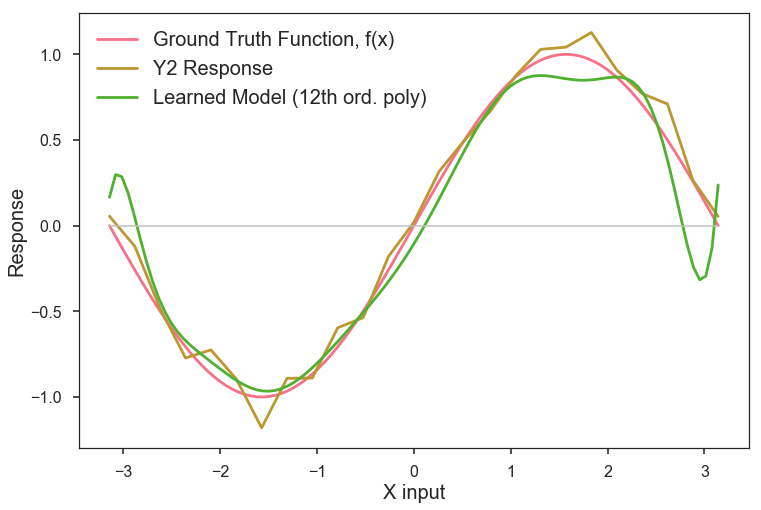

In [144]:
"""Grab 25 points from x_axis, generate 25 Y responses"""
N = 25
X = np.linspace(-np.pi, np.pi, N)
Y2 = f(X) + np.random.randn(N)*NOISE_VARIANCE

"""Plot final result"""
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x_axis, ground_truth_function)
plt.plot(X, Y2)
plt.plot(x_axis, prediction_axis_poly_12)
plt.plot(x_axis, y_0, linewidth=1.5, color='silver')

"""Create legend & labels"""
ax.legend(['Ground Truth Function, f(x)', 
           'Y2 Response', 'Learned Model (12th ord. poly)'], fontsize=20)
ax.set_xlabel('X input', fontsize=20)
ax.set_ylabel('Response', fontsize=20)

plt.show()

Clearly, with our new **Y2 Response**, our learned model did not perform as well. Let's clearly go over with this was the case, because it can be confusing:
> 1. We started with a ground truth function $f(x)$ that our model never gets to learn from
2. This ground truth function generates our first **Y response**, which is a combination of the ground truth function and noise
3. As we increased the order of our linear regression model, $\hat{f}(x)$, it began to **learn the noise** in the **Y response**. 
4. This noise is **random**, meaning that when we generate another response, **Y2**, it will be different
5. If we then use the same learned linear regression model to try and make predictions on **Y2**, it will *not* perform as well

This is a very common problem in machine learning and statistics and is often known as...

<br>
# 5. Bias-Variance Trade Off
What we just uncovered is known as the **bias-variance trade-off**. Bias refers to the error in your model. In other words, it is **how far off your prediction is from the target**. **Variance** refers to the amount by which $\hat{f}$ would change if we estimated it using a different training data set.

<br>
## 5.1 Bias Visualization 
So, to demonstrate Bias we can look at our 1st order polynomial plot:

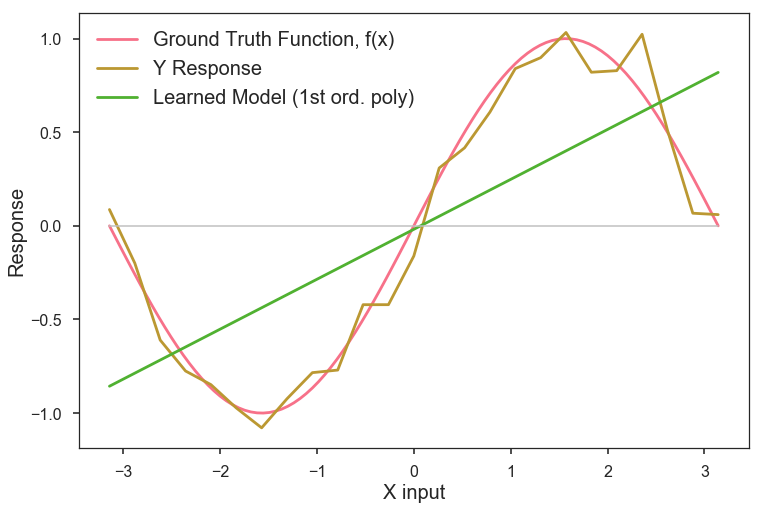

In [145]:
"""Grab 25 points from x_axis, generate 25 Y responses, create X polynomial"""
N = 25
X = np.linspace(-np.pi, np.pi, N)
X_poly_d_1 = make_poly(X, 1)                       # shape 25 x 2 (1 bias term, 1 weight)

"""Create Linear Regression Model"""
model_d1 = LinearRegression()
model_d1.fit(X_poly_d_1, Y)


"""Create x axis polynomial for plotting, and Y response based on model"""
x_axis_poly = make_poly(x_axis, 1)
prediction_axis = model_d1.predict(x_axis_poly)

"""Plot final result"""
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x_axis, ground_truth_function)
plt.plot(X, Y)
plt.plot(x_axis, prediction_axis)
plt.plot(x_axis, y_0, linewidth=1.5, color='silver')

"""Create legend & labels"""
ax.legend(['Ground Truth Function, f(x)', 
           'Y Response', 'Learned Model (1st ord. poly)'], fontsize=20)
ax.set_xlabel('X input', fontsize=20)
ax.set_ylabel('Response', fontsize=20)

plt.show()

We can clearly see here that the **learned model** is too simple to learn the underlying ground truth function. Variance is best shown if we refer back to our **Y response** and **Y2 Response** from earlier. We can plot two **learned models**, one trained on each, and see how they differ!

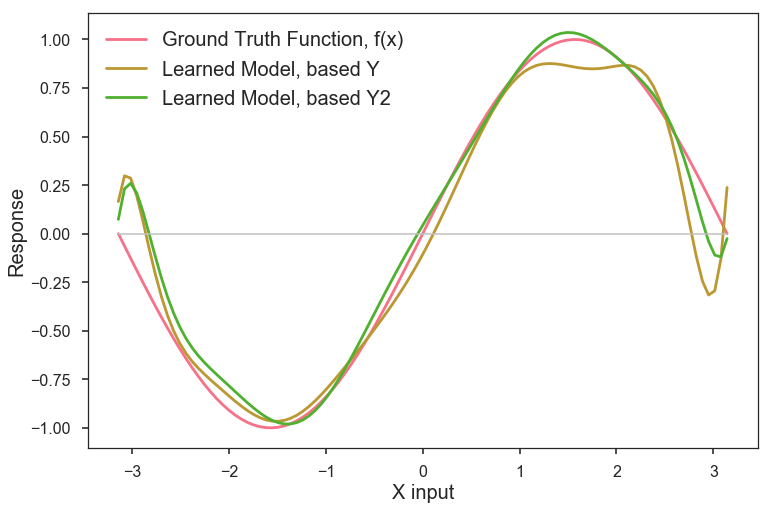

In [146]:
"""Grab 25 points from x_axis"""
N = 25
X = np.linspace(-np.pi, np.pi, N)

"""------------- Create Linear Regression Model, Order 12 --------------"""
X_poly_d_12_Y2 = make_poly(X, 12)                       # shape 25 x 13 (1 bias term, 12 weight)
model_d12_Y2 = LinearRegression()
model_d12_Y2.fit(X_poly_d_12_Y2, Y2)

# Create x axis polynomial for plotting, and Y response based on model
x_axis_poly_12 = make_poly(x_axis, 12)
prediction_axis_poly_12_Y2 = model_d12_Y2.predict(x_axis_poly_12)




"""Plot final result"""
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(x_axis, ground_truth_function)
plt.plot(x_axis, prediction_axis_poly_12)
plt.plot(x_axis, prediction_axis_poly_12_Y2)
plt.plot(x_axis, y_0, linewidth=1.5, color='silver')

"""Create legend & labels"""
ax.legend(['Ground Truth Function, f(x)',
           'Learned Model, based Y', 'Learned Model, based Y2'], fontsize=20)
ax.set_xlabel('X input', fontsize=20)
ax.set_ylabel('Response', fontsize=20)

plt.show()

So, variance can be thought of as the difference between the **learned model based on Y**, and the **learned model based on Y2** above. These are both **12th** order linear regression models, the difference arises from the fact that they were trained on different **Y responses**, and they began to learn the noise in addition to the ground truth function. 

Now, if you have gone through my Section1 Bias-Variance Trade-Off walkthrough then you know that there is a concept that as you decrease bias you increase variance, and vice versa. 

---
<br>
## 5.2 Bias-Variance Trade-Off Demo
The be way to demonstrate this is through a demo, so we are going to redo the demo conducted in that walk through with out current knowledge. The derivation for **bias** and **variance** can be found in that walk through, but for reference: 

#### $$err= \Big[f(x) - \bar{f}(x)\Big]^2 + E\Big[(\hat{f}(x) - \bar{f}(x))^2\Big] + E\Big[\epsilon^2\Big]$$

#### $$err = bias^2 + variance + \sigma_\epsilon^2$$

The idea of the demo is as follows:
> 1. Create **50 different Y responses**, each of which is based on the **ground truth function** and some **noise**. 
2. For **every Y response**, we then want to train 12 different linear regression models
3. The linear regression models will consist of the 1st through the 12th order polynomial feature input.
4. So, we will end up with 50 1st order models, 50 2nd order models, and so on up to the 12th order. We will have 600 trained models in total.
5. We then want to calculate the bias and variance ..... LEFT OFF HERE

So, lets get started! 

<br>
## 5.2.1 Initialization and Data Creation Step
The first thing that we need to do is actually create all of the data and data structures that we are going to us in this experiment. We will go over each piece now to make sure there is no ambiguity about what is going on.
> * **NUM_DATA_SETS**: The number of different **Y responses** that we are going to work with, 50. In other words we are going to have 50 different **Y responses** that are based on the **ground truth function** and **noise**, which will differ for each response.
<br>
**NOISE_VARIANCE**: The noise by definition will have a mean of 0, but its variance will be 0.5<br>
**MAX_POLY**: The highest order polynomial we will create in attempt to learn the ground truth function. We are going to go up to the 12th order.<br>
**N**: The number of data points we have to work with, 25. These points will be evenly spaced from [-$\pi$, $\pi$].<br>
**Ntrain**: The number of data points we will use to train our model on, 22. 
**x_axis**: 100 evenly spaced points from [-$\pi$, $\pi$]. These points will be used when plotting the full function that our model has learned.<br>
**ground_truth_function**: The output of our ground truth function, $f(x) = sin(x)$, for 100 points.<br>
**X**: `N` (which is 25) evenly spaced points from [-$\pi$, $\pi$].<br>
**f_X**: ground truth function prediction for `X` data points, (25 in total)<br>
**Xpoly**: A 12 order polynomial that was created from our original `X`. It has the form: 
#### $$Xpoly = x_1 + x_1^2 + x_1^3 +...+x_1^{12} = x_1 + x_2 + x_3 + ...+x_{12}$$
**train_scores**: a 50 x 12 matrix that holds the training score of each model. There are 12 dimensions, and 50 data sets, so 600 models total.<br>
**test_scores**: a 50 x 12 matrix that holds the testing score of each model. There are 12 dimensions, and 50 data sets, so 600 models total.<br>
**train_predictions**: 3 dimemsional matrix (Ntrain x NUM_DATASETS x MAX_POLY) = (22 x 50 x 12) that holds the predictions of each training point, for every model. Initialized to zeros.
**prediction_curves**: 3 dimensional matrix (100 x NUM_DATASETS x MAX_POLY) = (100 x 50 x 12) that holds 100 prediction points, for every model. Initialized to zeros. We need to this for plotting. 


In [147]:
"""Set constant values"""
NUM_DATASETS = 50       # Want to perform this over 50 different data sets
NOISE_VARIANCE = 0.5    # This is our amount of noise 
MAX_POLY = 12           # Will go up to the 12th order polynomial, i.e. the most complex
N = 25                  # Each example has 25 data points
Ntrain = int(0.9 * N)   # Training size of 22 data points

np.random.seed(2)       # Set random number generator seed for debugging

"""Redefine axis data"""
x_axis = np.linspace(-np.pi, np.pi, 100)
ground_truth_function = f(x_axis)            # Can also be thought of as y_axis

"""Define actual dataset X"""
X = np.linspace(-np.pi, np.pi, N)            # shape (25 x 1)
np.random.shuffle(X)
f_X = f(X)                                   # ground truth function for our 25 X data points

"""Create 13th order polynomial from X"""
Xpoly = make_poly(X, MAX_POLY)               # shape (25 x 13)

"""Create empty arrays to hold experiment data"""
# Each dataset/polynomial pair train and test score
train_scores = np.zeros((NUM_DATASETS, MAX_POLY))    # Shape (50 x 12)
test_scores = np.zeros((NUM_DATASETS, MAX_POLY))  

# Set of training predictions for each dataset/polynomial pair
train_predictions = np.zeros((Ntrain, NUM_DATASETS, MAX_POLY)) 
prediction_curves = np.zeros((100, NUM_DATASETS, MAX_POLY))

<br>
## 5.2.2 Create Y Responses, Train Models, Plot Predictions
Now that most of the setup is out of the way we can get to the first fun part of the demo! The goal here is as follows: 
> 1. We want to generate **50 different Y responses**, that will be based off of our ground truth function and noise, as we have discussed. The first `for` loop accomplishes that, and also splits up our data into train and test sets. 
2. We then, based on **each of the 50 Y responses and corresponding X inputs**, want to train a 12 linear regression model's. The first model will be a only have 1 feature (simple linear regression), the second will have 2 features, and so on, up until we have 12 total features (all of which all called multiple linear regression).
3. It is really important to remember that each time we iterate `k`, we now have a **new Y response** that is being used to train out model. 
4. So, in the inner `for` loop, we fit our model and then make all of our predictions, for both the train and test X data.
5. We then grab our train and test predictions, store our training predictions, calculate our train and test scores, and then store both scores. 
6. Then with our trained model, we make 100 predictions that we can use for plotting purposes. We then store those predictions in `prediction_curves` , grab our `train` and `test` predictions. At this point we store our `train_prediction` in `train_predictions`. 
7. At this point we want to make 12 different plots, one for each order polynomial. Each plot will have the ground truth function, the average of all 50 trained models, and all 50 trained models. 

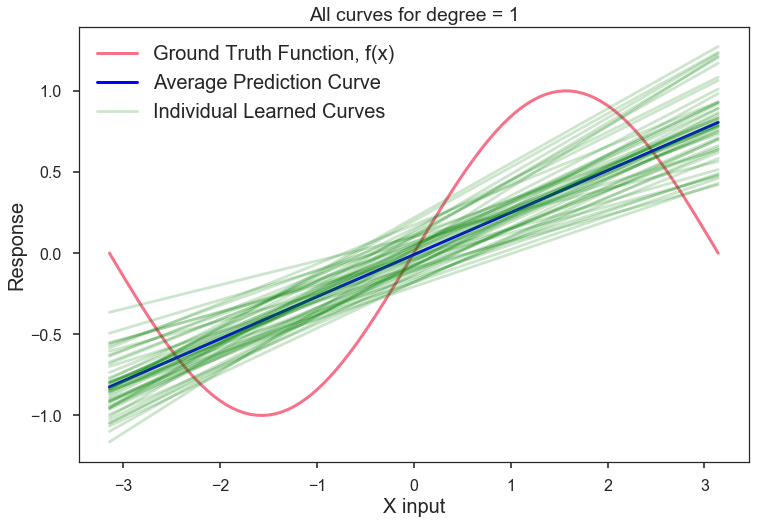

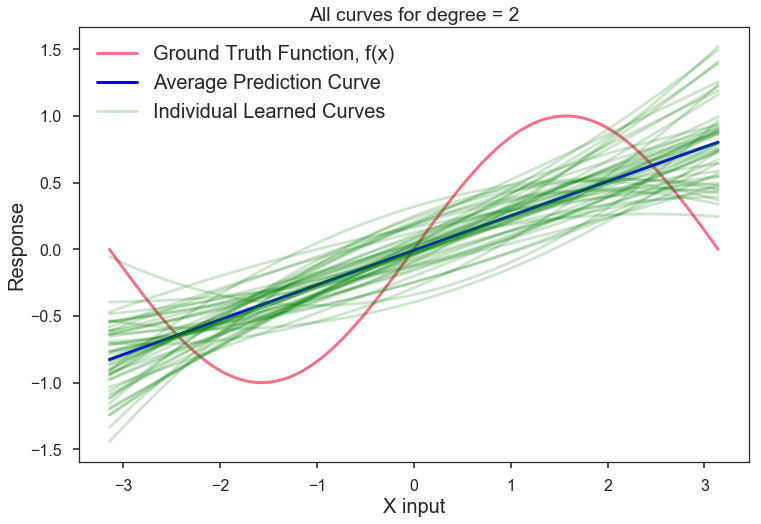

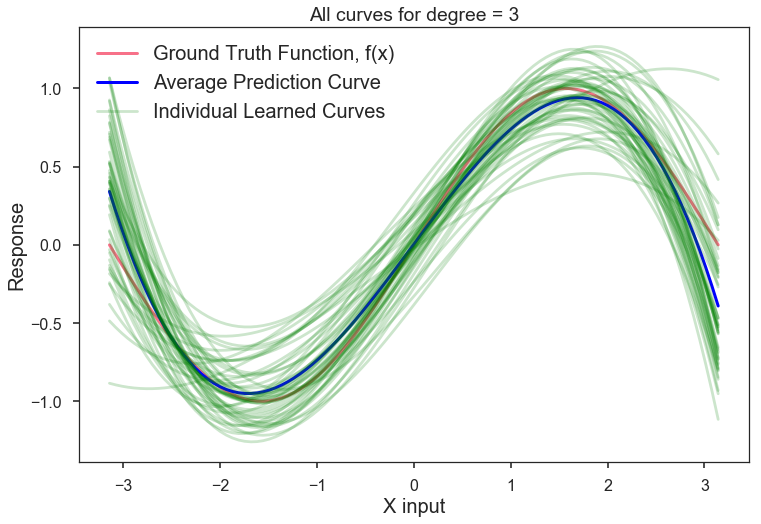

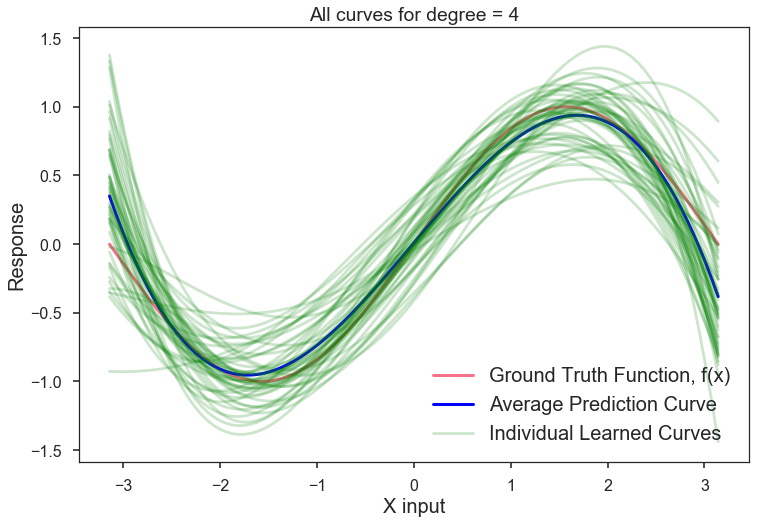

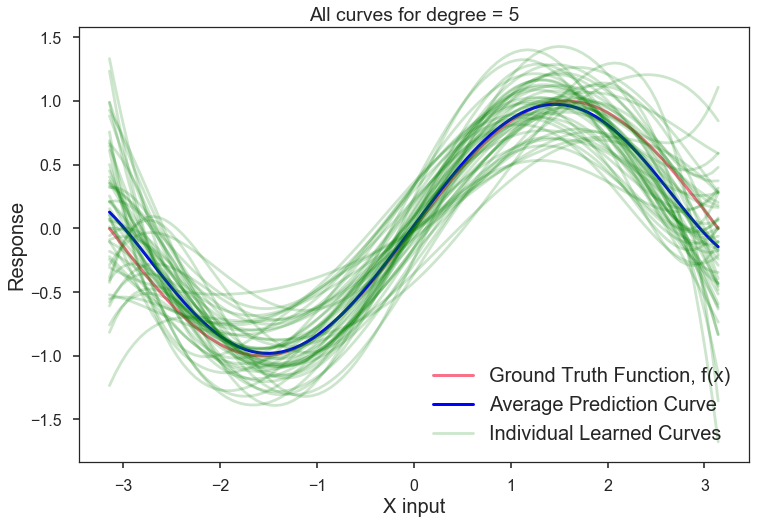

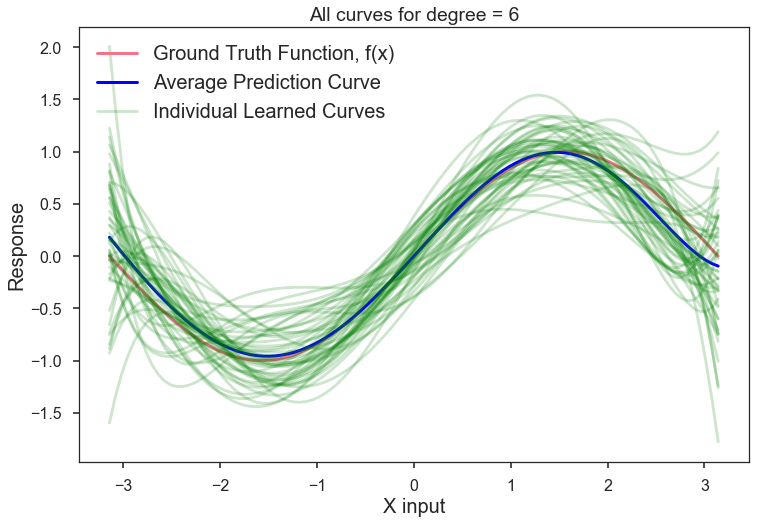

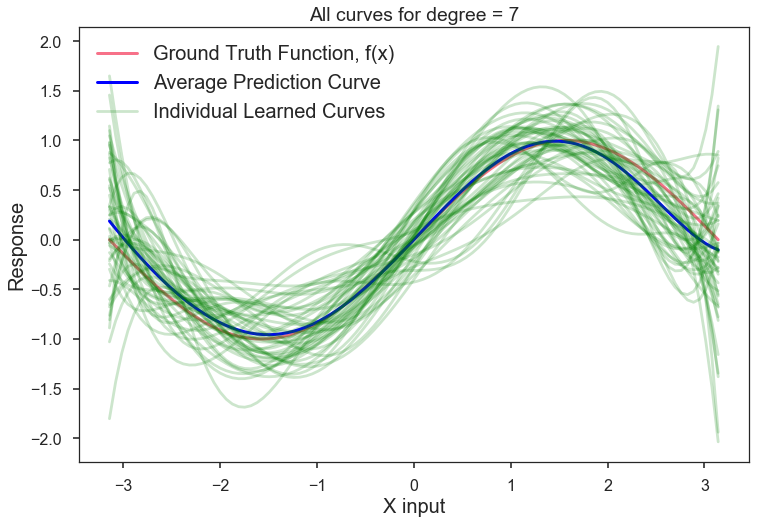

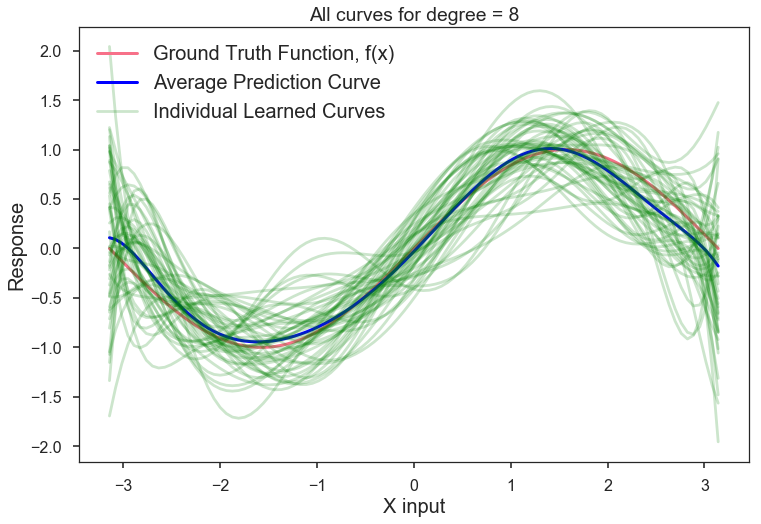

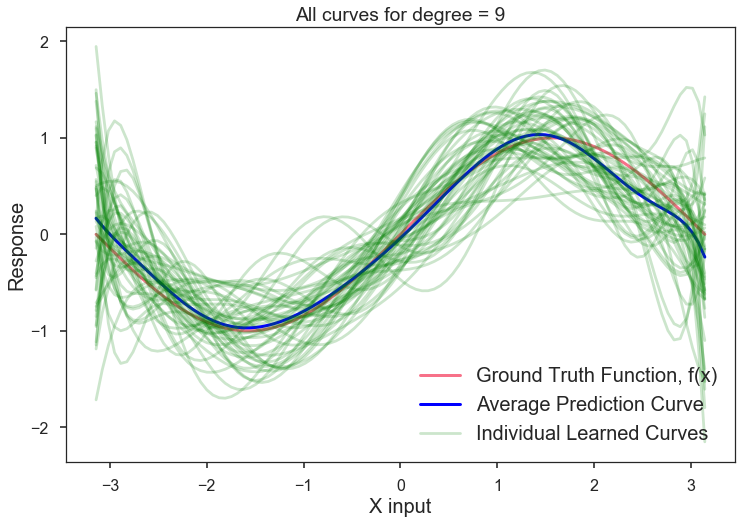

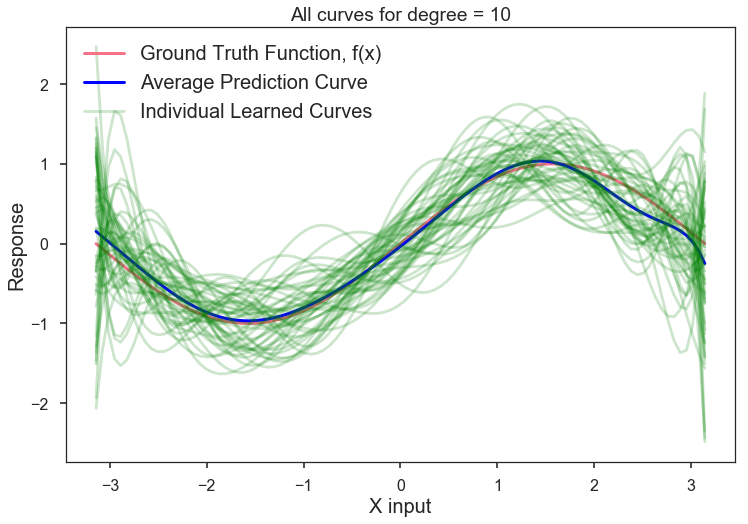

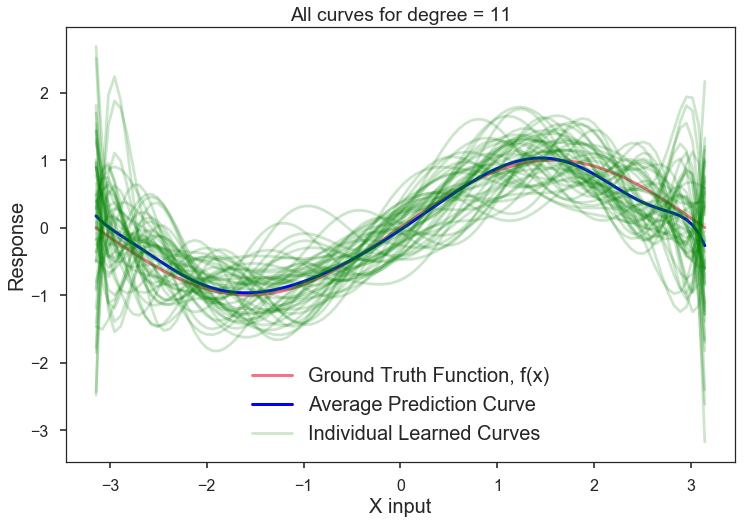

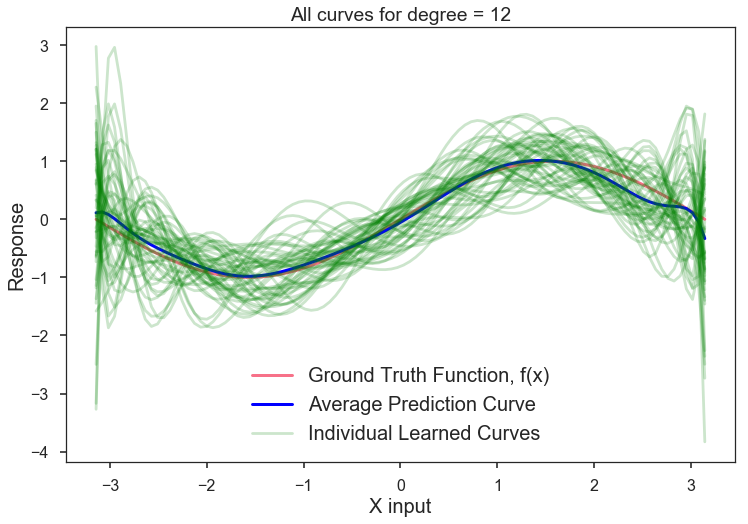

In [148]:
model = LinearRegression()

# looping through our total number of datasets
for k in range(NUM_DATASETS):
    Y = f_X + np.random.randn(N) * NOISE_VARIANCE   # specific data set for this experiment
    
    Xtrain = Xpoly[:Ntrain]                 # our training data, 22 x MAX_POLY 
    Ytrain = Y[:Ntrain]                     # Our response we are trying to map, 22 x 1 
    
    Xtest = Xpoly[Ntrain:]                  # test data, 3 x MAX_POLY, 3 x 13
    Ytest = Y[Ntrain:]                      # 3 x 1
    
    # looping through all of the polynomial degrees 
    for d in range(MAX_POLY):
        model.fit(Xtrain[:, :d + 2], Ytrain)         # an additional polynomial term each time
        predictions = model.predict(Xpoly[:, :d+2])  # make ALL predictions (train & test)
        
        # grab train and test predictions
        train_prediction = predictions[:Ntrain]
        test_prediction = predictions[Ntrain:]
        
        # use this to calculate bias/variance later
        train_predictions[:,k,d] = train_prediction 
        
        # calculate train and test scores 
        train_score = mse(train_prediction, Ytrain)
        test_score = mse(test_prediction, Ytest)
        
        # store these scores 
        train_scores[k,d] = train_score
        test_scores[k,d] = test_score
        
        # Need this for plotting our continuous output 
        x_axis_poly = make_poly(x_axis, d + 1)
        prediction_axis = model.predict(x_axis_poly)
        
        # all predictions over entire x axis
        # shape (100, 50, 12), holds predictions across x axis for each d and each dataset k 
        # in other words we train our model on 25 points, but then predict on 100 for plot
        prediction_curves[:, k, d] = prediction_axis 
        
"""Plot all prediction curves, along with mean curve """
for d in range(MAX_POLY):
    # plotting ground truth function, f(x) = sin(x)
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(x_axis, ground_truth_function, linewidth=3.0)
    
    # plotting mean curve (mean of all k = 50 datasets, for specific degree d)
    plt.plot(x_axis, prediction_curves[:,:,d].mean(axis=1), color='blue', linewidth=3.0)
    for k in range(NUM_DATASETS):
        # plot x axis, prediction curves at k d (specific data set, and specific polynomial)
        plt.plot(x_axis, prediction_curves[:,k,d], color='green', alpha=0.2)
    
    """Create legend & labels"""
    ax.legend(['Ground Truth Function, f(x)',
           'Average Prediction Curve', 'Individual Learned Curves'], fontsize=20)
    ax.set_xlabel('X input', fontsize=20)
    ax.set_ylabel('Response', fontsize=20)
    
    
    plt.title("All curves for degree = %d" % (d+1))
    plt.show()

Excellent! We have some pretty interesting plots now to look at, and I think hopeful a better intuition for how noise can affect the models that we are able to learn. Now, the main question that you should be having is: "well which one of these models is the best one?"

That is the main point of this demo! To figure that out. There are several ways that we can go about doing this, but lets think back to some of the theory we have discussed so far. We know that error in our model can be derived as:
#### $$err = bias^2 + variance + \sigma_\epsilon^2$$
And we are not able predict $\epsilon$, so that means that the way to minimize error is to minimize the sum of our squared bias and variance. Another way to look at this is that we want to minimize our **test error**, which we just so happen to be keeping track of. Which one of those is correct? Well, let's go through the final portion of the demo and we will find out.

<br>
## 5.2.3 Calculate $Bias^2$, Variance, Train/Test Score
We can start by calculating the squared bias and variance, but just a refresher, here is what we derived them to be:
#### $$bias^2= \Big[f(x) - \bar{f}(x)\Big]^2 $$
#### $$Variance= E\Big[(\hat{f}(x) - \bar{f}(x))^2\Big]$$

We can see that the **bias** is the **ground truth** minus the **average estimator**, the **variance** is the **variance of the estimator**, and the **irreducible error** is the **variance of the data noise**. 

Note that each order polynomial will have a $bias^2$ and variance that we need to find. For example, we will take all 50 models that were learned for the 6th order polynomial, and use their averages in order to find the correct values. 

So in order to calculate the bias:
> 1. We will create an array `avg_train_prediction` of size (22 x 12) to hold the **mean** or **expected value** of our polynomial function at the specific value of x
2. We are going to loop through each polynomial, and each of the Ntrain training points. 
3. For each training point and each polynomial, we will find the average response across all 50 respective learned models. This will be done for all training points. At this point we will have a (22 x 12) matrix of average training predictions for each training point, and each respective polynomial model
4. Then, by definition, squared bias is the ground truth function at x, minus the average prediction of our learned model at x, squared. We then just take the average of that to end up at our final result. 

And in order to calculate the **variance**:
> 1. We again want to find the variance for each order polynomial, at each training data point. So, we start by create a matrix of zeros, size (22 x 12).
2. We then, again, loop through each polynomial and each of the Ntrain data points
3. For each training point and each polynomial, we will find the training predictions across all 50 respective learned models and subtract the average training prediction, $\bar{f}$. We will call this difference delta.
4. Then we square delta, take the sum, and divide by the total number of entries, in this case NUM_DATASETS, or 50. 
5. This gives us a variance for each training data point at each polynomial, which we then want the expected value (average) in order to find our final variance.

At this point we will finish by making two plots: leaving off here.

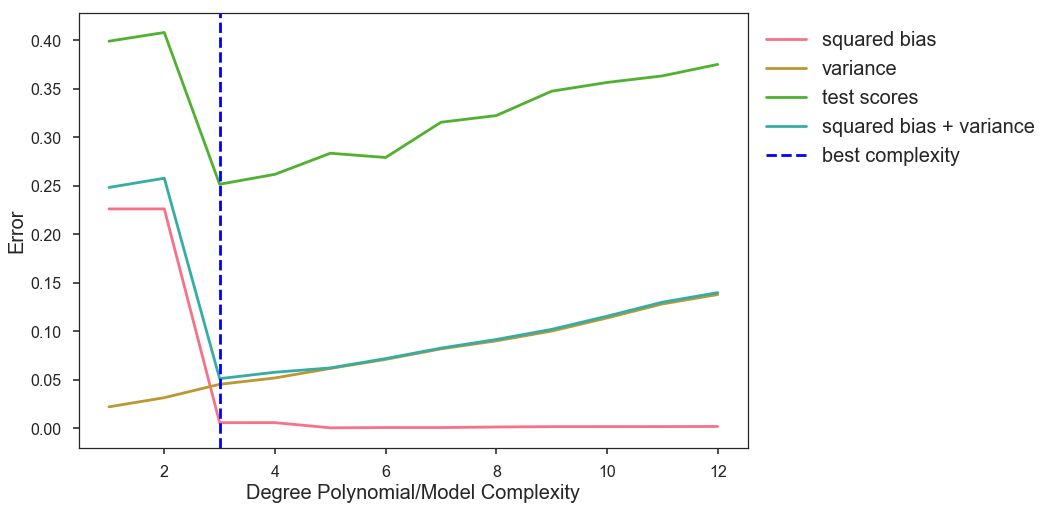

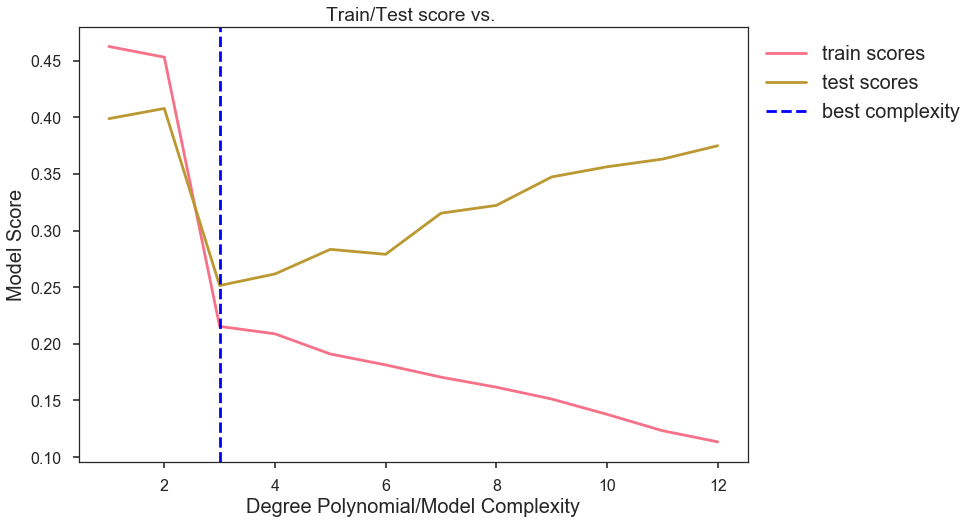

In [206]:
"""------------------------ Calculate the squared bias's ------------------------""" 
avg_train_prediction = np.zeros((Ntrain, MAX_POLY))
squared_bias = np.zeros(MAX_POLY)
f_Xtrain = f_X[:Ntrain]                 # ground truth response for training data
for d in range(MAX_POLY):               # loop through all of the polynomials
    for i in range(Ntrain):             # loop through all of the data points
        # find average train prediction for this data point and degree polynomial
        # equal to mean of train predictions at this data point, for all experiments, at 
        # this degree polynomial 
        avg_train_prediction[i,d] = train_predictions[i, :, d].mean()

    # squared bias is the average train prediction for this degree poly, minus f_Xtrain,
    # squared and then averaged
    squared_bias[d] = ((f_Xtrain - avg_train_prediction[:,d])**2).mean()
    
"""------------------------ Calculate the Variances ------------------------"""
variances = np.zeros((Ntrain, MAX_POLY))
for d in range(MAX_POLY):                  # loop through all of the polynomials
  for i in range(Ntrain):                  # loop through all of the data points
    delta = train_predictions[i,:,d] - avg_train_prediction[i,d]
    # this step could also be (delta * delta).sum() / Ntrain
    variances[i,d] = delta.dot(delta) / NUM_DATASETS
variance = variances.mean(axis=0)

"""------------------------ Create bias-variance plots ------------------------"""
degrees = np.arange(MAX_POLY) + 1
best_degree = np.argmin(test_scores.mean(axis=0)) + 1
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(degrees, squared_bias, label='squared bias')
plt.plot(degrees, variance, label='variance')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.plot(degrees, squared_bias + variance, label='squared bias + variance')
plt.axvline(x=best_degree, linestyle='--', label='best complexity', color="blue")
"""Create legend & labels"""
ax.set_xlabel('Degree Polynomial/Model Complexity', fontsize=20)
ax.set_ylabel('Error', fontsize=20)
plt.legend(fontsize=20, bbox_to_anchor=(1, 1), loc=2)
plt.show()

"""------------------------ Create Train/Test Score Plots ------------------------"""
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(degrees, train_scores.mean(axis=0), label='train scores')
plt.plot(degrees, test_scores.mean(axis=0), label='test scores')
plt.axvline(x=best_degree, linestyle='--', label='best complexity', color="blue")
ax.set_xlabel('Degree Polynomial/Model Complexity', fontsize=20)
ax.set_ylabel('Model Score', fontsize=20)
plt.legend(fontsize=20, bbox_to_anchor=(1, 1), loc=2)
plt.title("Train/Test score vs. ")
plt.show()